In [1]:
# pandas and plotting libraries for visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# module containing functions for manipulating pyspark dataframes
import pyspark.sql.functions as f

# class which will let us create spark objects
from pyspark.sql import SparkSession

# helper functions for intro class
from helpers import display, read_df

## [PySpark SQL docs](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html)
 - the main functions you'll need to manipulate data in pyspark dataframes are in this module

## [Data Dictionary](https://digital.cityofchicago.org/index.php/chicago-taxi-data-released/)
 - details about the dataset used, here filtered down to just 2016 data

## Create a Spark Session

In [2]:
spark = (
    SparkSession
    .builder
    .appName('data_exploration')
    .master('local[2]')
    .getOrCreate()
)

## Read in data file

In [3]:
df = read_df(spark, '../taxi_2016')

In [4]:
display(df)

,trip_id,taxi_id,start_time,end_time,trip_miles,pickup_census_tract,dropoff_census_tract,fare,tips,trip_total,payment_type,company
0,2d4585c3a01188a7032e7bea0f2ac686a869832c,fe33d0d63aa20b97b9d4440ad1b6637ea21a0df546aa0d...,2016-12-17 23:30:00,2016-12-17 23:30:00,0.8,1.703128e+10,1.703183e+10,5.50,1.00,7.00,Credit Card,None
1,2d458675ac892b200cb039fbbe845e2e90c1131c,c12e0923159de80ee3288c44047308ab8f602fbfb2278f...,2016-02-20 02:30:00,2016-02-20 02:30:00,2.6,1.703108e+10,1.703124e+10,9.75,2.15,12.90,Credit Card,Choice Taxi Association
2,2d4587774ae4ef68c78e7f328c6b0a12873a50db,0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...,2016-02-11 07:15:00,2016-02-11 07:45:00,0.8,NaN,NaN,39.50,0.00,39.50,Cash,Taxi Affiliation Services
3,2d458989ecc7bd5aa9f8657c4bbe430347ab5189,874b25eb25690a1a0361023234f59edeee52101733a1ab...,2016-08-17 18:45:00,2016-08-17 19:00:00,1.8,1.703108e+10,1.703183e+10,10.25,2.00,12.75,Credit Card,None
4,2d458a76dea4503ee43e5f6f41166a219eacb7ce,45772661016b0b77e44155eaf32f92d2f4e9e2702c0fc3...,2016-07-15 00:15:00,2016-07-15 00:30:00,5.1,NaN,NaN,16.50,3.00,21.00,Credit Card,Dispatch Taxi Affiliation


In [5]:
df.columns

['trip_id',
 'taxi_id',
 'start_time',
 'end_time',
 'trip_miles',
 'pickup_census_tract',
 'dropoff_census_tract',
 'fare',
 'tips',
 'trip_total',
 'payment_type',
 'company']

In [6]:
display(df, 10)

,trip_id,taxi_id,start_time,end_time,trip_miles,pickup_census_tract,dropoff_census_tract,fare,tips,trip_total,payment_type,company
0,2d4585c3a01188a7032e7bea0f2ac686a869832c,fe33d0d63aa20b97b9d4440ad1b6637ea21a0df546aa0d...,2016-12-17 23:30:00,2016-12-17 23:30:00,0.8,1.703128e+10,1.703183e+10,5.50,1.00,7.00,Credit Card,None
1,2d458675ac892b200cb039fbbe845e2e90c1131c,c12e0923159de80ee3288c44047308ab8f602fbfb2278f...,2016-02-20 02:30:00,2016-02-20 02:30:00,2.6,1.703108e+10,1.703124e+10,9.75,2.15,12.90,Credit Card,Choice Taxi Association
2,2d4587774ae4ef68c78e7f328c6b0a12873a50db,0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...,2016-02-11 07:15:00,2016-02-11 07:45:00,0.8,NaN,NaN,39.50,0.00,39.50,Cash,Taxi Affiliation Services
3,2d458989ecc7bd5aa9f8657c4bbe430347ab5189,874b25eb25690a1a0361023234f59edeee52101733a1ab...,2016-08-17 18:45:00,2016-08-17 19:00:00,1.8,1.703108e+10,1.703183e+10,10.25,2.00,12.75,Credit Card,None
4,2d458a76dea4503ee43e5f6f41166a219eacb7ce,45772661016b0b77e44155eaf32f92d2f4e9e2702c0fc3...,2016-07-15 00:15:00,2016-07-15 00:30:00,5.1,NaN,NaN,16.50,3.00,21.00,Credit Card,Dispatch Taxi Affiliation
5,2d458ce051e1c3df37cbc558f5b6d2b08124f759,c7a2b9554ad4efdac7ae4fc8ad99678ffefa21bccf6d23...,2016-02-01 14:15:00,2016-02-01 14:30:00,0.9,NaN,NaN,5.25,2.00,7.25,Credit Card,Choice Taxi Association
6,2d45909db256152aa66aa873560661dd39cd29cd,717bdd1375852978c2b13163e7a2ced4bf2b1ba3fedd7d...,2016-07-22 19:00:00,2016-07-22 19:15:00,0.0,1.703184e+10,1.703132e+10,8.25,0.00,9.25,Cash,Blue Ribbon Taxi Association Inc.
7,2d4591ce2e9eb27b01b32d217a0aeb827ac3ca33,a6dda627be96fe26d3b2b06015a2a60358b81f91ca6c3a...,2016-05-06 12:00:00,2016-05-06 12:00:00,1.6,1.703108e+10,1.703132e+10,8.75,0.00,8.75,Cash,Choice Taxi Association
8,2d459255c0555c5f27672bfeb76478d3f5a2f2a4,150f952a157d37aa920fa023dab72e26571e385da717dc...,2016-12-12 18:00:00,2016-12-12 18:00:00,0.6,1.703108e+10,1.703108e+10,6.00,2.25,8.25,Credit Card,Taxi Affiliation Services
9,2d4594b7e5a76eeb0392331a84765083d4d3ee4a,26edb3e8696634e7487211836362c9a979d32c0aad09e4...,2016-03-19 16:15:00,2016-03-19 16:30:00,0.1,1.703108e+10,1.703128e+10,8.50,2.00,11.50,Credit Card,Taxi Affiliation Services


In [7]:
total_rows = df.count() # ~3 million trips
print(total_rows)

2996733


In [8]:
display(df.agg(f.countDistinct('taxi_id')))

,count(DISTINCT taxi_id)
0,5103


In [9]:
display(df.agg((f.count('trip_miles')/total_rows).alias('trip_miles')))

,trip_miles
0,0.999997


In [10]:
display(df.agg(*[(f.count(c)/total_rows).alias(c) for c in df.columns]))

,trip_id,taxi_id,start_time,end_time,trip_miles,pickup_census_tract,dropoff_census_tract,fare,tips,trip_total,payment_type,company
0,1.0,1.0,1.0,0.999872,0.999997,0.707594,0.704954,1.0,1.0,1.0,1.0,0.635748


In [11]:
trips_per_taxi = df.groupBy('taxi_id').count()

In [12]:
display(trips_per_taxi, 10)

,taxi_id,count
0,26edb3e8696634e7487211836362c9a979d32c0aad09e4...,767
1,0e21caaf401f961b7ae5a4c3d8c5b70291ccc2b6c2138c...,1526
2,bb7eb49d01457ba3d389fa22e21f51c681a38b1032e6b2...,926
3,3ce16d151260438f64e60dbfdb5c395172745e87eb4032...,1438
4,7fdb1a17de97a3421482d73e46e0ea491c4cc101efbf31...,730
5,1e4ba7f6a2c79ac2220073aa7006dd757feed6b12d4a40...,900
6,5339c272e8a85babf1e53c2ab4689a3225f1d8128d7c60...,730
7,a3715bdf7bbe4780c74ae3ef616fb1b7e0cff450b2c93a...,547
8,3d7411b67bb74fa5dae3bf00929de0e93b6640441e123b...,539
9,eab2e03aa4079a472a76eed8937f465c6209088d87c232...,1180


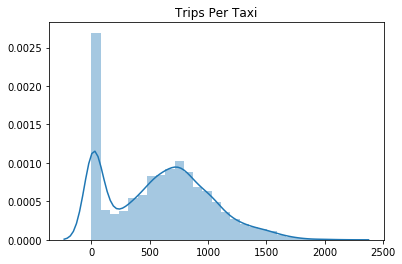

In [13]:
plt.figure()
sns.distplot(trips_per_taxi.select('count').toPandas()).set_title('Trips Per Taxi');

In [14]:
distance_traveled_per_taxi = (
    df
    .groupBy('taxi_id')
    .agg(f.sum('trip_miles').alias('miles'))
)

In [15]:
display(distance_traveled_per_taxi, 10)

,taxi_id,miles
0,26edb3e8696634e7487211836362c9a979d32c0aad09e4...,121.9
1,0e21caaf401f961b7ae5a4c3d8c5b70291ccc2b6c2138c...,243.4
2,bb7eb49d01457ba3d389fa22e21f51c681a38b1032e6b2...,3314.6
3,3ce16d151260438f64e60dbfdb5c395172745e87eb4032...,3673.6
4,7fdb1a17de97a3421482d73e46e0ea491c4cc101efbf31...,3246.7
5,1e4ba7f6a2c79ac2220073aa7006dd757feed6b12d4a40...,2260.1
6,5339c272e8a85babf1e53c2ab4689a3225f1d8128d7c60...,2613.1
7,a3715bdf7bbe4780c74ae3ef616fb1b7e0cff450b2c93a...,2014.4
8,3d7411b67bb74fa5dae3bf00929de0e93b6640441e123b...,2800.5
9,eab2e03aa4079a472a76eed8937f465c6209088d87c232...,4424.0


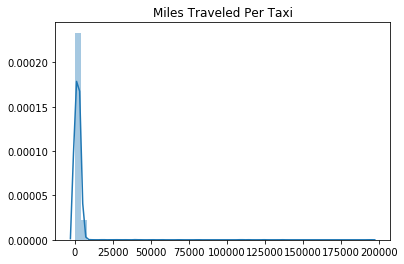

In [16]:
plt.figure()
(
    sns
    .distplot(distance_traveled_per_taxi.select('miles').toPandas())
    .set_title('Miles Traveled Per Taxi')
);

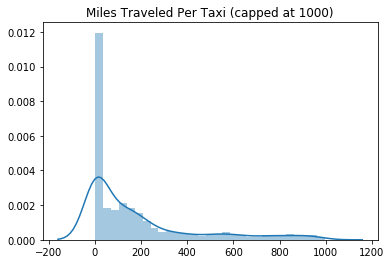

In [17]:
plt.figure()
(
    sns
    .distplot(distance_traveled_per_taxi.where('miles < 1000').select('miles').toPandas())
    .set_title('Miles Traveled Per Taxi (capped at 1000)')
);

In [18]:
display(distance_traveled_per_taxi.orderBy(f.desc('miles')), 10)

,taxi_id,miles
0,435c3f0bb3774c35800330140eb6a9027c7f72033f0a60...,194405.2
1,3ae312cce1e5d2337872c81e8f1e7873a88de4d26fd7ae...,136752.4
2,0ee86e2a204cc2224e9ff2494686ee474cce6aba093a1b...,124433.4
3,26d55de9d7e34ab98da76d4c1c5e7d5c5507bc02dcdbb4...,114369.9
4,11cec1092eb4f4b50433778d436f251983dd37d567f709...,110540.2
5,93d7461f270fbd0bf1d961575942b018e48b4098378028...,108515.6
6,770c8eeffb35f5fb925ceecfac5201171e3ecdaf5bacaa...,81092.7
7,bf144d3085b875983198aca2ccfa966dc544b7423ca28f...,68766.8
8,be6e132cb81dc67a9a57334ddff99eda582058219760a4...,57247.8
9,6c102217d9b79e673a7f41e646aaa9c519dff7d3850f86...,50961.8


## Exercises

In [19]:
# when do most trips occur? 

In [20]:
display(
    df
    .groupby(f.hour('start_time'))
    .count()
    .orderBy(f.desc('count')),
    10
)

# Looks like early evening is most popular, with most trips starting between 5-7pm

,hour(start_time),count
0,18,203141
1,19,202953
2,17,186837
3,20,177710
4,16,170546
5,13,159066
6,15,158205
7,14,156662
8,12,155005
9,21,153670


In [21]:
# what's the most common length for a trip in miles? in minutes?

In [22]:
display(df.groupBy('trip_miles').count().orderBy(f.desc('count')), 10)

# Looks like most trips are under a mile, with the highest number being listed at 0 miles 
# (remember these distances are rounded)

,trip_miles,count
0,0.0,587415
1,0.1,108619
2,1.0,103831
3,0.8,99960
4,1.1,98133
5,0.9,98009
6,0.7,94416
7,1.2,81139
8,0.6,80929
9,1.3,72499


In [23]:
trip_length_minutes = (
    df
    .withColumn(
        'minutes',
        (f.unix_timestamp(f.col('end_time')) - f.unix_timestamp(f.col('start_time')))/60
    )
    .groupBy('minutes')
    .count()
)

display(trip_length_minutes.orderBy('count', ascending=False), 10)

# The vast majority are under an hour, with most being around 15 minutes (this data is rounded to the nearest 15)

,minutes,count
0,15.0,1441188
1,0.0,1072438
2,30.0,311602
3,45.0,112245
4,60.0,40230
5,75.0,11817
6,90.0,3236
7,105.0,1104
8,120.0,517
9,NaN,384


In [24]:
# are there companies that only use cash or only use credit?

In [25]:
cash = (
    df
    .where('payment_type == "Cash"')
    .where('company is not null')
    .select('company')
    .distinct()
)
credit = (
    df
    .where('payment_type == "Credit Card"')
    .where('company is not null')
    .select('company')
    .distinct()
)

print('{} companies use cash, {} companies use credit'.format(cash.count(), credit.count()))

54 companies use cash, 54 companies use credit


In [26]:
display(cash.join(credit, on='company', how='left_anti')) # select rows in cash that are not in credit

,company
0,4732 - Maude Lamy


In [27]:
display(credit.join(cash, on='company', how='left_anti')) # select rows in credit that are not in cash

,company
0,Suburban Dispatch LLC
